# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

# My solution

# 1. Import package

In [0]:
import io
import re

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
link = 'https://raw.githubusercontent.com/nnbtam99/coderschool-ds-t2-t4/master/W04%20-%20Data%20manipulation%20%2B%20Visualization/01%20-%20Chocolate%20Bar%20Ratings/flavors_of_cacao.csv'

df = pd.read_csv(link)

# 2. Data cleaning

## Normalize column names

In [0]:
new_columns = ['company', 'specific_origin', 'REF', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
df.columns = new_columns

In [289]:
df.head().T

,0,1,2,3,4
company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
specific_origin,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
review_date,2016,2015,2015,2015,2015
cocoa_percent,63%,70%,70%,70%,70%
company_location,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5
bean_type,,,,,
broad_origin,Sao Tome,Togo,Togo,Togo,Peru


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company             1795 non-null object
specific_origin     1795 non-null object
REF                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_origin        1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


## Check each column to find poorly labeled data

In [291]:
# As Bean_Type and Broad_Bean_Origin may be optional attributes, we accept NaN values for these features
df.isna().sum()

company             0
specific_origin     0
REF                 0
review_date         0
cocoa_percent       0
company_location    0
rating              0
bean_type           1
broad_origin        1
dtype: int64

### Check all values of each feature

In [292]:
df['company_location'].sort_values().unique()

# UK includes Ireland, Scotland, Wales and England, so the values are quite ambiguous --> Perhaps U.K in this context referes to England 
# Dominican Republic is mispelled
# Nicaragua is mispelled
# Amsterdam is a city of Netherlands, not a country --> So Amsterdam should be replaced with Netherlands

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [293]:
# This column datatype is object, which is quite unreasonable
# I'll remove the '%' symbol and convert it to float 
df['cocoa_percent'].unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

In [294]:
# Check if bean_type has mispelled or missing values
df['bean_type'].sort_values().unique()

array(['Amazon', 'Amazon mix', 'Amazon, ICS', 'Beniano', 'Blend',
       'Blend-Forastero,Criollo', 'CCN51', 'Criollo', 'Criollo (Amarru)',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 67)',
       'Criollo (Ocumare 77)', 'Criollo (Ocumare)', 'Criollo (Porcelana)',
       'Criollo (Wild)', 'Criollo, +', 'Criollo, Forastero',
       'Criollo, Trinitario', 'EET', 'Forastero', 'Forastero (Amelonado)',
       'Forastero (Arriba)', 'Forastero (Arriba) ASS',
       'Forastero (Arriba) ASSS', 'Forastero (Catongo)',
       'Forastero (Nacional)', 'Forastero (Parazinho)',
       'Forastero(Arriba, CCN)', 'Forastero, Trinitario', 'Matina',
       'Nacional', 'Nacional (Arriba)', 'Trinitario',
       'Trinitario (85% Criollo)', 'Trinitario (Amelonado)',
       'Trinitario (Scavina)', 'Trinitario, Criollo',
       'Trinitario, Forastero', 'Trinitario, Nacional',
       'Trinitario, TCGA', '\xa0', nan], dtype=object)

In [295]:
# Check if broad_origin has mispelled or missing values
df['broad_origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

## Clean poorly labeled data

#### Remove unicode space '\xa0'

In [0]:
df.replace(u'\xa0',u'', regex=True, inplace=True)

#### Clean cocoa_percent column

In [297]:
df['cocoa_percent'] = [r.replace('%', '') for r in df['cocoa_percent']]
df['cocoa_percent'] = df['cocoa_percent'].astype('float64')
df.dtypes

company              object
specific_origin      object
REF                   int64
review_date           int64
cocoa_percent       float64
company_location     object
rating              float64
bean_type            object
broad_origin         object
dtype: object

#### Clean company_location column

In [298]:
# UK includes Ireland, Scotland, Wales and England, so the values are quite ambiguous --> Perhaps U.K in this context referes to England 
# Dominican Republic is mispelled
# Nicaragua is mispelled
# Amsterdam is a city of Netherlands, not a country --> So Amsterdam should be replaced with Netherlands


df['company_location'] = df['company_location']\
  .replace('U.K.', 'England')\
  .replace('Domincan Republic', 'Dominican Republic')\
  .replace('Niacragua', 'Nicaragua')\
  .replace('Amsterdam', 'Netherlands')

df['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Madagascar', 'Martinique', 'Mexico', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'],
      dtype=object)

#### Clean broad_origin column

In [299]:
# nan is numpy datatype --> fillna before applying text_processing
# Some specific origins are blend-type --> I'll check if blend-type denote something about the broad origin

df[df['specific_origin'].str.contains('Blend')].head(10)

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,
381,Chloe Chocolat,Blend No. 1,672,2011,70.0,France,3.50,,
393,Chocolate Alchemist-Philly,"Philly Blend, 5 plantations",1772,2016,80.0,U.S.A.,2.50,,
564,Domori,Blend No. 1,272,2008,78.0,Italy,3.50,Blend,
725,Fruition,Signature Blend,753,2011,66.0,U.S.A.,3.25,Trinitario,Costa Rica
747,Guido Castagna,Lacri Blend,355,2009,76.0,Italy,3.00,,Venezuela
748,Guido Castagna,Blend,355,2009,64.0,Italy,3.25,,"Ven, Trinidad, Ecuador"
749,Guittard,"Epique, Blend No. 49",1602,2015,70.0,U.S.A.,3.75,,
785,Harper Macaw,Brazil Blend,1696,2015,67.0,U.S.A.,3.00,,Brazil
957,L'Amourette,Blend,853,2012,72.0,U.S.A.,3.00,Criollo,"Peru, Ecuador, Venezuela"


In [0]:
# As we can guess, if a kind of chocolate derives from too many countries, its broad origin will be missing
# Hence I'll fill missing broad_origin with its specific origin
df['broad_origin'].fillna(df['specific_origin'], inplace = True)

In [301]:
df['broad_origin'].sort_values().unique()

array(['', 'Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 

In [0]:
# Many countries are refered by different names and abbreviations
# Eg: Dominican Republic is Dominican Rep., DR, D.R., Domin. Rep, etc
# Modify so that every country will be refered with just 1 name

def text_prep(text):
    replacements = {
        '-':', ', '/ ': ', ', '/': ', ', '\(': ', ',' and':', ', ' & ': ', ', '\)': '',
        'Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic':'Dominican Republic',
        'Mad,|Mad$':'Madagascar, ',
        'PNG': 'Papua New Guinea, ',
        'Guat,|Guat$': 'Guatemala, ',
        'Ven,|Ven$|Venez,|Venez$':'Venezuela, ',
        'Ecu,|Ecu$|Ecuad,|Ecuad$': 'Ecuador, ',
        'Nic,|Nic$': 'Nicaragua, ',
        'Cost Rica':'Costa Rica',
        'Mex,|Mex$': 'Mexico, ',
        'Jam,|Jam$': 'Jamaica, ',
        'Haw,|Haw$': 'Hawaii, ',
        'Gre,|Gre$': 'Greneda, ',
        'Tri,|Tri$': 'Trinidad, ',
        'C Am':'Central America',
        'S America':'South America',
        ', $':'', ',  ': ', ', ', ,':', ', '\xa0':' ',',\s+': ',',
        ' Bali': ',Bali',
        'nacional': 'Nacional'
    }
    
    for k, v in replacements.items():
      text = re.sub(k, v, text)

    return text

In [303]:
df['broad_origin'].str.replace('.', '').apply(text_prep).sort_values().unique()

array(['', 'Africa,Carribean,Central America', 'Australia', 'Belize',
       'Bolivia', 'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean,Dominican Republic,Jamaica,Trinidad',
       'Central,South America', 'Colombia', 'Colombia,Ecuador', 'Congo',
       'Costa Rica', 'Costa Rica,Venezuela', 'Cuba', 'Dominican Republic',
       'Dominican Republic,Bali', 'Dominican Republic,Ecuador,Peru',
       'Dominican Republic,Madagascar', 'Ecuador', 'Ecuador,Costa Rica',
       'Ecuador,Madagascar,Papua New Guinea', 'El Salvador', 'Fiji',
       'Gabon', 'Ghana', 'Ghana,Dominican Republic', 'Ghana,Madagascar',
       'Ghana,Panama,Ecuador', 'Grenada',
       'Greneda,Papua New Guinea,Hawaii,Haiti,Madagascar', 'Guatemala',
       'Guatemala,Dominican Republic,Peru,Madagascar,Papua New Guinea',
       'Haiti', 'Hawaii', 'Honduras', 'India', 'Indonesia',
       'Indonesia,Ghana', 'Ivory Coast', 'Jamaica', 'Liberia',
       'Madagascar', 'Madagascar,Ecuador',
       'Madagascar,Java,Papu

In [0]:
df['broad_origin'] = df['broad_origin'].str.replace('.', '').apply(text_prep)

In [305]:
df.broad_origin.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Vene

##Save root data after cleaning to csv

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# %cd '/content/drive/My Drive/CoderSchool/Chocolate'

In [0]:
# df.to_csv('chocolate.csv', index=False)

In [0]:
# df.review_date.head(2)

##Convert broad_origins to list

In [0]:
def split_places(origin):
  return origin.split(',')

broad_origins = df.broad_origin.apply(split_places)

In [0]:
### get list of broad origins:
def get_broad_origins_list(origins_series):
  origins = {}
  for ls in origins_series.values:
    for origin in ls:
      if origin not in origins:
        origins.update({origin : 1})
      else:
        origins[origin]+=1
  return origins

unique_broad_origins = get_broad_origins_list(broad_origins)

In [312]:
origin_df = pd.DataFrame.from_dict(unique_broad_origins, orient='index', columns=['count'])
origin_df.head()

,count
Sao Tome,17
Togo,3
Peru,176
Venezuela,228
Cuba,11


In [313]:
origin_df.reset_index(drop=False, inplace=True);
origin_df.rename(columns={'index':'country'}, inplace=True);
origin_df.head()


,country,count
0,Sao Tome,17
1,Togo,3
2,Peru,176
3,Venezuela,228
4,Cuba,11


number of bean types in each broad_origin


In [314]:
origin_df.dropna(axis=0, inplace=True)
origin_df.describe()

,count
count,66.000000
mean,28.454545
std,50.167161
min,1.000000
25%,2.250000
50%,8.000000
75%,33.250000
max,228.000000


In [0]:
origin_df.to_csv('broad_origins.csv', index=False)

#Data Understanding

In [316]:
df.head().T
df.groupby('company_location', as_index = False).max().sort_values(by = 'rating', ascending = False).head(1)

,company_location,company,specific_origin,REF,review_date,cocoa_percent,rating,broad_origin
29,Italy,Urzi,Venezuela,1672,2015,100.0,5.0,"Venezuela,Trinidad,Ecuador"


#EDA

##Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

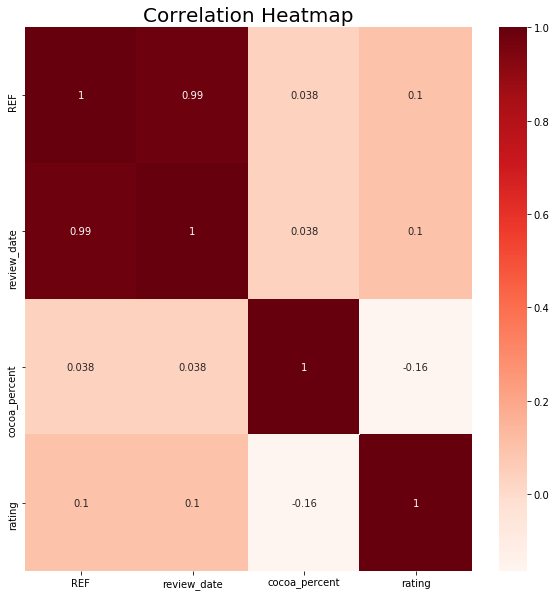

In [317]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

## Rating

### In General

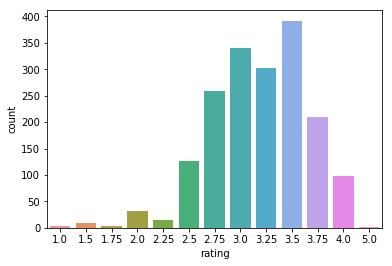

In [318]:
# rating_count = df.rating.value_counts().to_frame('count');
# rating_count.reset_index(drop=False, inplace=True);
# rating_count.rename(columns={'index':'rating'}, inplace=True);
# rating_count.head(2)
sns.countplot(x='rating', data=df)

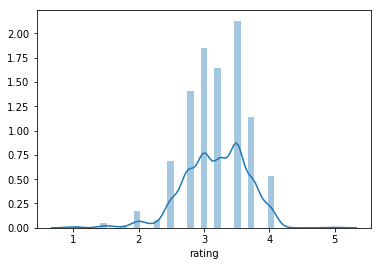

In [319]:
sns.distplot(df['rating']);

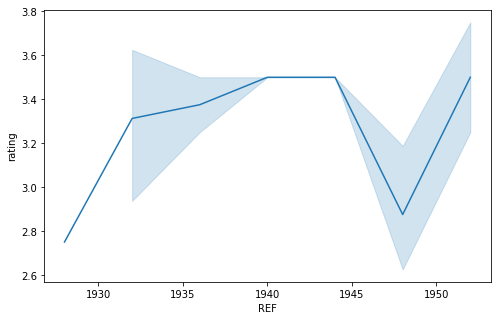

In [320]:

plt.figure(figsize=(8, 5))
sns.lineplot(x='REF', y='rating', data=df[df.review_date==2017].sort_values(by='REF', ascending=True))

### Classify rating marks

In [0]:
def rating_classify(rating):
  if rating >= 5:
    return 'elite'
  if rating >= 4 and rating < 5:
    return 'premium'
  if rating >= 3 and rating < 4:
    return 'satisfactory'
  if rating >= 2 and rating < 3:
    return 'disapointing'
  return 'unpleasant'

In [322]:
df['rating_class'] = df.rating
df.rating_class = df.rating_class.apply(rating_classify);
df.head(2)

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,satisfactory
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,disapointing


###Rare chocolate: Premium and Elite

['satisfactory', 'disapointing', 'premium', 'unpleasant', 'elite']


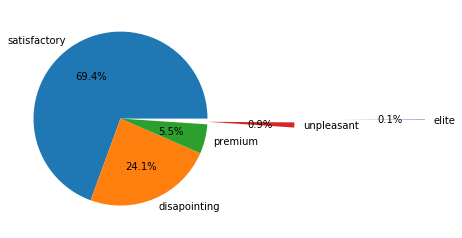

In [323]:
classes = df.rating_class.value_counts().index.tolist()
sizes = df.rating_class.value_counts().values.tolist()
print(classes)
explode=(0, 0, 0, 1, 2.5)
plt.pie(sizes, labels=classes, explode=explode, autopct='%1.1f%%')
plt.show()



In [324]:
df.rating_class.value_counts()

satisfactory    1246
disapointing     432
premium           98
unpleasant        17
elite              2
Name: rating_class, dtype: int64

### Correlation between rating with cocoa percent

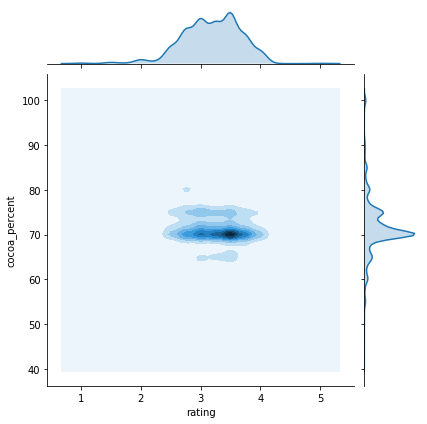

In [325]:
sns.jointplot(x="rating", y="cocoa_percent", kind='kde', data=df);

###Compare the relationships between cocoa_percent and rating

#### Top 10 rating company

In [377]:
com_loca_cocoa_percent = df[['company','company_location', 'cocoa_percent', 'rating']].groupby(['company','company_location']).mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company,company_location,cocoa_percent,rating
381,Tobago Estate (Pralus),France,70.000000,4.000000
287,Ocelot,Scotland,72.500000,3.875000
183,Heirloom Cacao Preservation (Zokoko),U.S.A.,70.000000,3.875000
14,Amedei,Italy,69.538462,3.846154
249,Matale,Australia,71.000000,3.812500
304,Patric,U.S.A.,69.833333,3.791667
191,Idilio (Felchlin),Switzerland,72.000000,3.775000
96,Christopher Morel (Felchlin),Canada,68.000000,3.750000
125,Dole (Guittard),U.S.A.,70.000000,3.750000
2,Acalli,U.S.A.,70.000000,3.750000


#### Top 10 rating company location

In [376]:
com_loca_cocoa_percent = df[['company_location', 'cocoa_percent', 'rating']].groupby('company_location').mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company_location,cocoa_percent,rating
7,Chile,70.000000,3.750000
39,Philippines,65.000000,3.500000
35,Netherlands,71.625000,3.500000
25,Iceland,68.666667,3.416667
56,Vietnam,74.545455,3.409091
5,Brazil,69.823529,3.397059
40,Poland,71.875000,3.375000
1,Australia,70.224490,3.357143
22,Guatemala,70.200000,3.350000
53,Switzerland,71.210526,3.342105


### Popular

#### Top 10 Popular Company

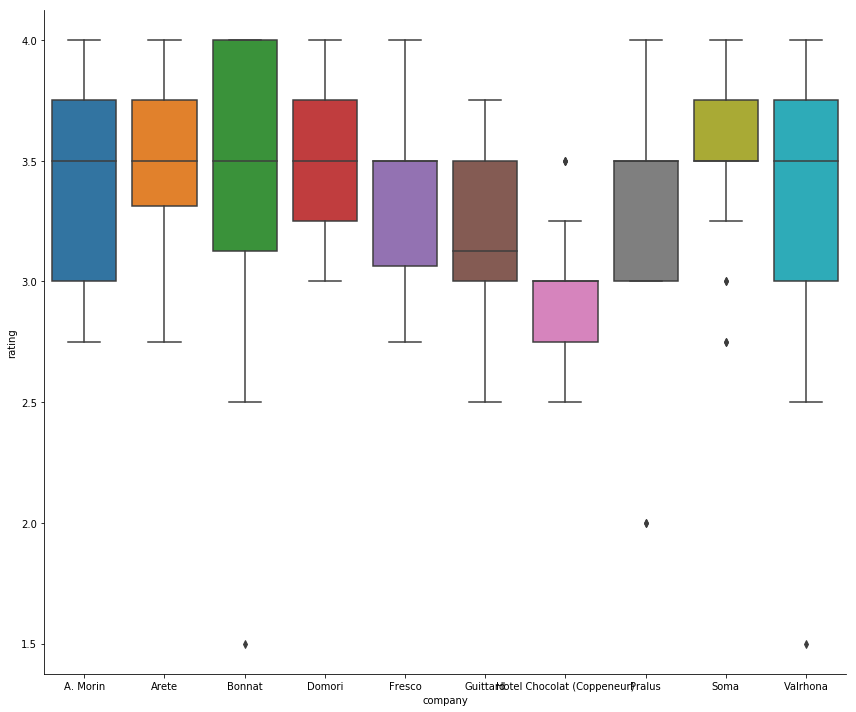

In [326]:
def n_most_company(n):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

ten_most_company = n_most_company(10)

def is_top_10_company(x):
  if x in ten_most_company:
    return True
  else:
    return False
  
top_10_company = df[df['company'].apply(is_top_10_company)]

ax = sns.catplot(x="company", y="rating", kind="box", data=top_10_company,aspect =1.2, height=10)


#### Top 10 Popular Company Location

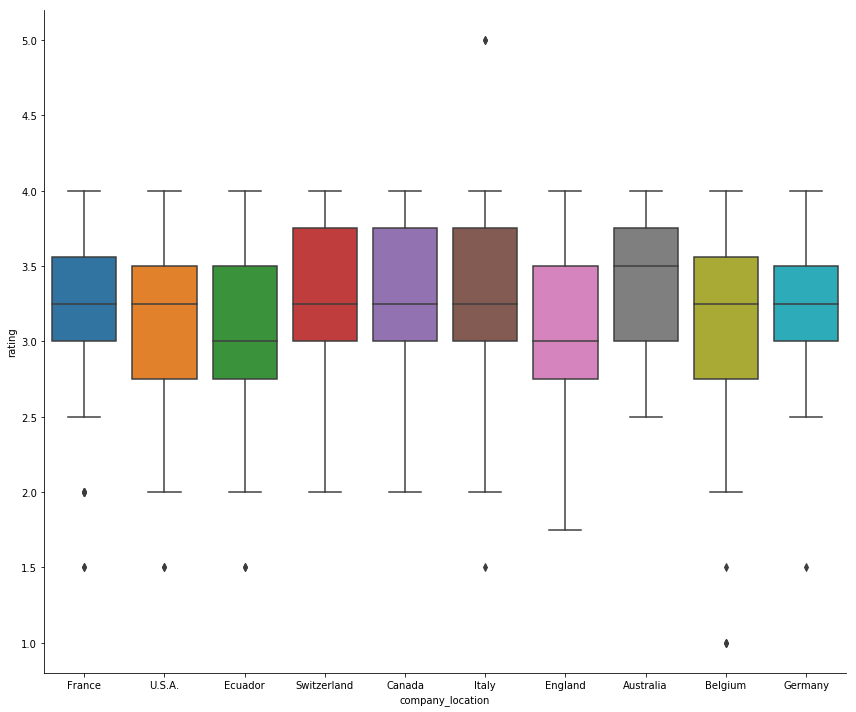

In [327]:
def n_most_company_location(n):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company_location').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

ten_most_company_location = n_most_company_location(10)

def is_top_10_company_location(x):
  if x in ten_most_company_location:
    return True
  else:
    return False
  
top_10_company_location = df[df['company_location'].apply(is_top_10_company_location)]
ax = sns.catplot(x="company_location", y="rating", kind="box", data=top_10_company_location,height =10, aspect =1.2)

##Analysis by year

### In General

Text(0.5, 1.0, 'Distribution of review date')

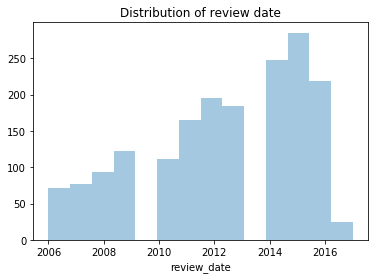

In [330]:
sns.distplot(df['review_date'],kde=False);
plt.title('Distribution of review date')
# Perfect period is 2012-2016
# Worst period is 2006-2009

In [331]:
#dverage cocoa_percent by year
avg_cocoa_year = df.groupby('review_date').mean()
avg_cocoa_year


,REF,cocoa_percent,rating,count
review_date,,,,
2006,54.375000,71.000000,3.125000,1.0
2007,151.155844,72.038961,3.162338,1.0
2008,256.086022,72.698925,2.994624,1.0
2009,389.585366,70.443089,3.073171,1.0
2010,540.306306,70.779279,3.148649,1.0
2011,703.787879,70.969697,3.256061,1.0
2012,900.692308,71.528205,3.178205,1.0
2013,1101.152174,72.266304,3.197011,1.0
2014,1319.165992,72.253036,3.189271,1.0


### Correlation between review date and rating

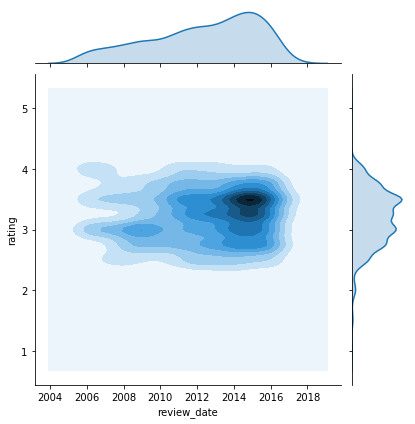

In [333]:
sns.jointplot(x="review_date", y="rating", kind='kde', data=df);
## We realize that 2012-2016 period has high rating

###Perfect period

In [0]:
perfect_period = df[(2012<= df['review_date']) & (df['review_date'] <= 2016)]

In [0]:
worst_period = df[(2010 > df['review_date'])]

Text(0.5, 1.0, 'Cocoa percent in worst period')

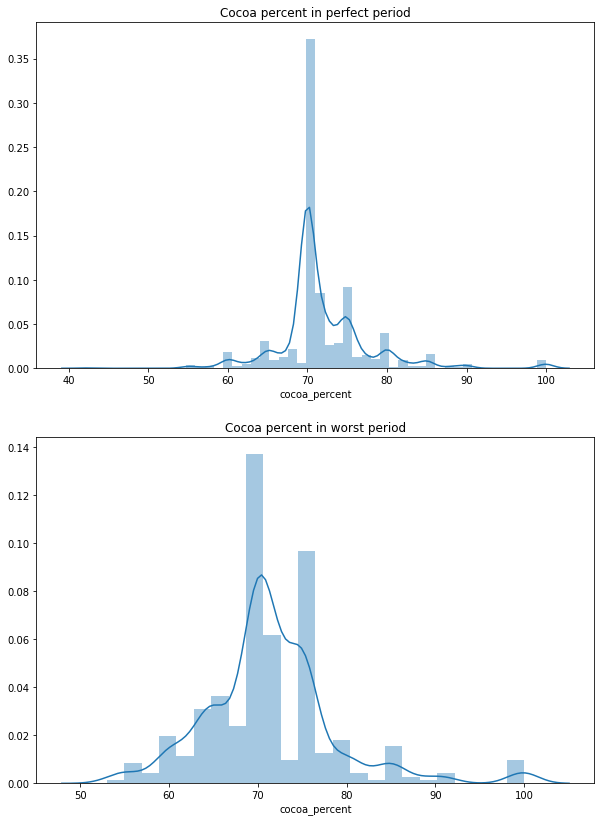

In [336]:
fig = plt.figure(figsize = (10,14))
fig.add_subplot(211)   #top left
ax = sns.distplot(perfect_period['cocoa_percent'])
plt.title('Cocoa percent in perfect period')
fig.add_subplot(212)   #
ax = sns.distplot(worst_period['cocoa_percent'])
plt.title('Cocoa percent in worst period')

#### Top 10 rating company

In [378]:
com_loca_cocoa_percent = perfect_period[['company','company_location', 'cocoa_percent', 'rating']].groupby(['company','company_location']).mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company,company_location,cocoa_percent,rating
233,Patric,U.S.A.,67.0,4.0000
258,Scharffen Berger,U.S.A.,78.0,4.0000
297,Tobago Estate (Pralus),France,70.0,4.0000
221,Ocelot,Scotland,72.5,3.8750
138,Heirloom Cacao Preservation (Zokoko),U.S.A.,70.0,3.8750
187,Matale,Australia,71.0,3.8125
304,Valrhona,France,66.5,3.7500
220,Obolo,Chile,70.0,3.7500
95,Duffy's,England,72.0,3.7500
240,Potomac,U.S.A.,70.0,3.7500


In [379]:
com_loca_cocoa_percent = worst_period[['company','company_location', 'cocoa_percent', 'rating']].groupby(['company','company_location']).mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company,company_location,cocoa_percent,rating
13,Cacao Sampaka,Spain,70.000000,4.000000
4,Amedei,Italy,69.500000,3.854167
47,Kakao,Germany,65.000000,3.750000
30,Dole (Guittard),U.S.A.,70.000000,3.750000
65,Patric,U.S.A.,70.500000,3.750000
55,Madecasse (Cinagra),Madagascar,68.750000,3.687500
66,Pierre Marcolini,Belgium,73.222222,3.583333
70,Salgado,Argentina,70.000000,3.500000
32,Domori,Italy,70.200000,3.483333
73,Soma,Canada,70.000000,3.416667


#### Top 10 rating company location

In [371]:
com_loca_cocoa_percent = perfect_period[['company_location', 'cocoa_percent', 'rating']].groupby('company_location').mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company_location,cocoa_percent,rating
5,Chile,70.000000,3.750
16,Guatemala,72.833333,3.500
29,Netherlands,73.250000,3.500
33,Philippines,65.000000,3.500
2,Belgium,71.500000,3.475


In [372]:
com_loca_cocoa_percent = worst_period[['company_location', 'cocoa_percent', 'rating']].groupby('company_location').mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company_location,cocoa_percent,rating
12,Italy,69.555556,3.493056
0,Argentina,73.750000,3.312500
13,Madagascar,71.083333,3.208333
8,Germany,70.222222,3.194444
7,France,72.930556,3.184028
3,Canada,71.818182,3.159091
11,Israel,71.250000,3.125000
10,Guatemala,67.500000,3.125000
16,Spain,72.307692,3.096154
17,Switzerland,70.300000,3.075000


#### Top 10 Company in perfect period

In [0]:
def n_most_company(n, df):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

In [338]:
ten_most_company = n_most_company(10, perfect_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def is_top_10_company(x):
  if x in ten_most_company:
    return True
  else:
    return False

In [0]:
top_10_company = perfect_period[perfect_period['company'].apply(is_top_10_company)]

In [341]:
ten_most_company_1 = n_most_company(10, worst_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def is_top_10_company_1(x):
  if x in ten_most_company_1:
    return True
  else:
    return False

In [0]:
top_10_company_1 = worst_period[worst_period['company'].apply(is_top_10_company_1)]

In [344]:
top_10_company_1['review_date'].unique()

array([2007, 2006, 2009, 2008])

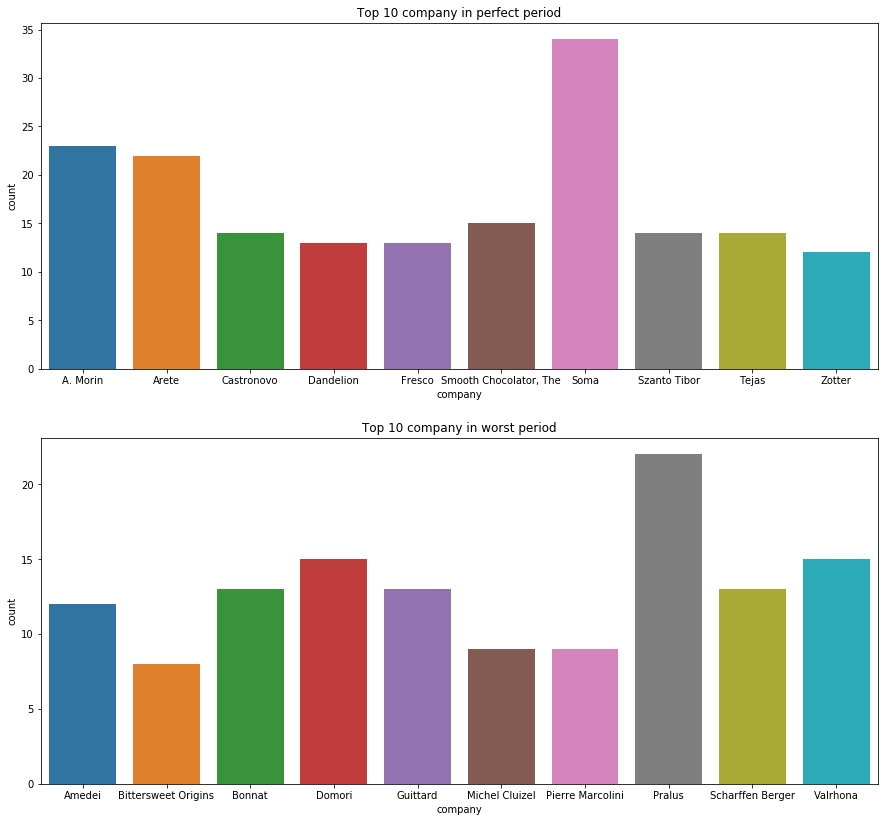

In [345]:
fig = plt.figure(figsize=(15,14))
fig.add_subplot(211)   #top left
ax = sns.countplot(x="company", data = top_10_company)
plt.title('Top 10 company in perfect period')

title = fig.add_subplot(212)   #top left
ax = sns.countplot(x="company", data = top_10_company_1)
title = plt.title('Top 10 company in worst period')
## We easily realize that the last company in perfect period is than better than the first company in worst period
## Soma is the best company to produce chocolate bar
## Top 10 in two period is completely different

#### Top 10 location company in perfect period 

In [0]:
def n_most_company_location(n, df):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company_location').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

In [347]:
ten_most_company_location = n_most_company_location(10, perfect_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def is_top_10_company_location(x):
  if x in ten_most_company_location:
    return True
  else:
    return False

In [0]:
top_10_company_location = perfect_period[perfect_period['company_location'].apply(is_top_10_company_location)]

In [350]:
ten_most_company_location_1 = n_most_company_location(10, worst_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [351]:
ten_most_company_location_1

Index(['U.S.A.', 'France', 'Ecuador', 'Italy', 'Belgium', 'England', 'Spain',
       'Madagascar', 'Canada', 'Switzerland'],
      dtype='object', name='company_location')

In [0]:
def is_top_10_company_location_1(x):
  if x in ten_most_company_location_1:
    return True
  else:
    return False

In [0]:
top_10_company_location_1 = worst_period[worst_period['company_location'].apply(is_top_10_company_location_1)]

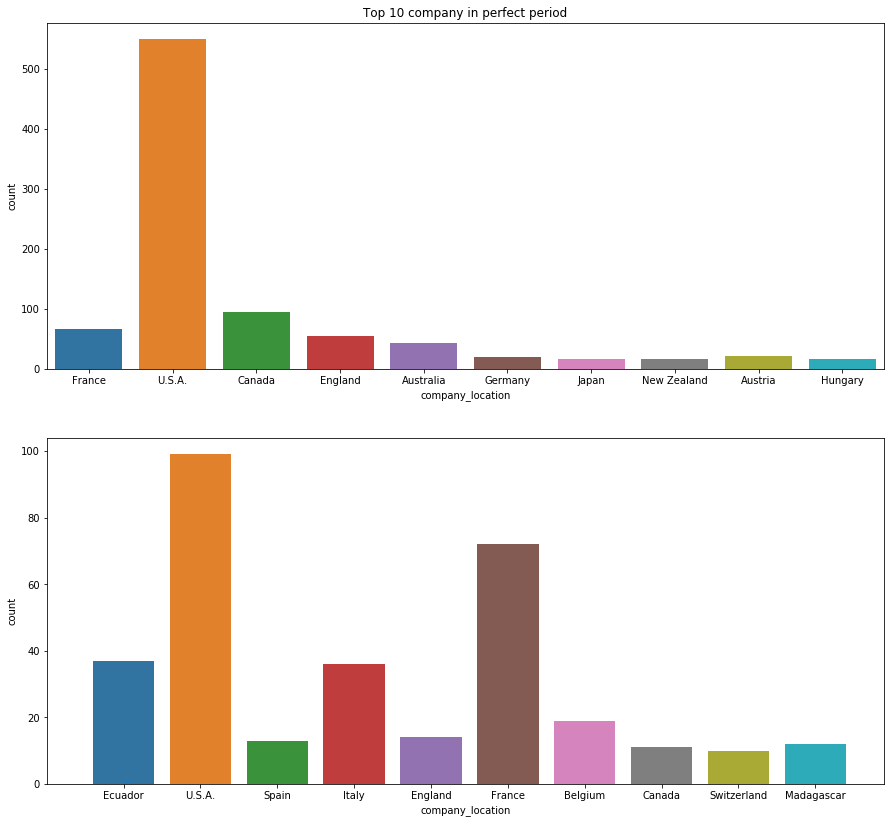

In [384]:
fig = plt.figure(figsize=(15,14))
fig.add_subplot(211)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location)
plt.title('Top 10 company in perfect period')

title = fig.add_subplot(212)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location_1)
title = plt.hist('Top 10 company in worst period')

# No matter time, U.S.A is the best location company 

In [0]:
def is_top_10_company_location_3(x):
  if x in ten_most_company_location and x !='U.S.A.':
    return True
  else:
    return False

In [0]:
def is_top_10_company_location_4(x):
  if x in ten_most_company_location_1 and x !='U.S.A.':
    return True
  else:
    return False

In [357]:
ten_most_company_location_3 = n_most_company_location(10, perfect_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
top_10_company_location_3 = perfect_period[perfect_period['company_location'].apply(is_top_10_company_location_3)]

In [359]:
ten_most_company_location_4 = n_most_company_location(10, worst_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
top_10_company_location_4 = perfect_period[perfect_period['company_location'].apply(is_top_10_company_location_4)]

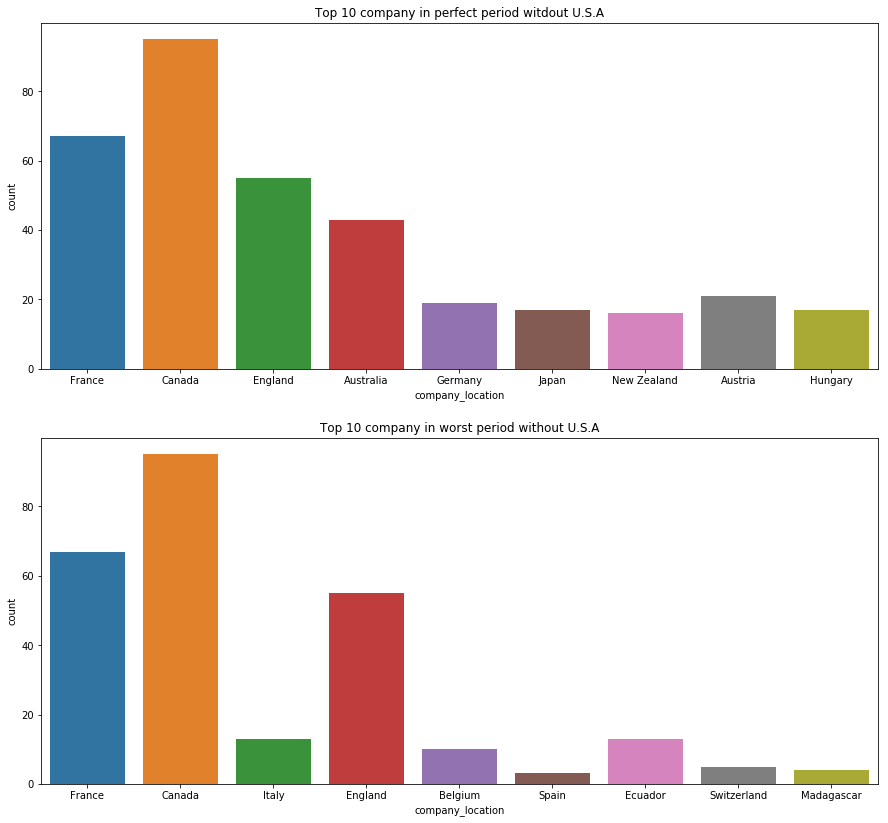

In [361]:
fig = plt.figure(figsize=(15,14))
fig.add_subplot(211)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location_3)
plt.title('Top 10 company in perfect period witdout U.S.A')

title = fig.add_subplot(212)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location_4)
title = plt.title('Top 10 company in worst period without U.S.A')

# No matter time, U.S.A is the best location company 

#Dashboard
[Google studio report](https://datastudio.google.com/open/10sOcznISznpPOziNiAKPRA-r14cTMN9h)

# Summary

# 